initial cost is inf
iteration = 0 cost: inf


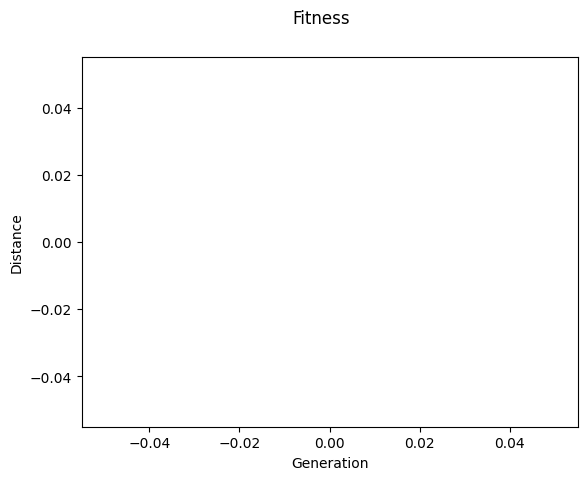

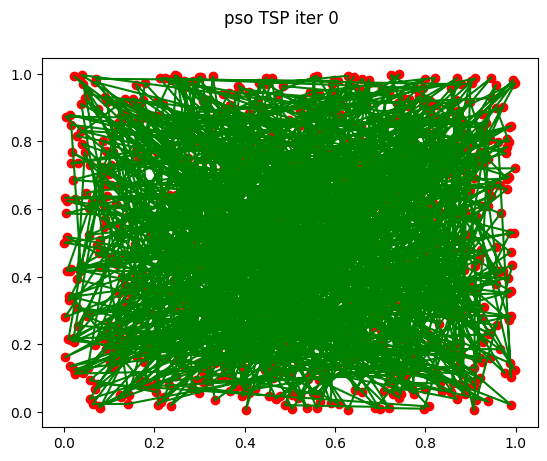

iteration = 100 cost: 53.4782852597951


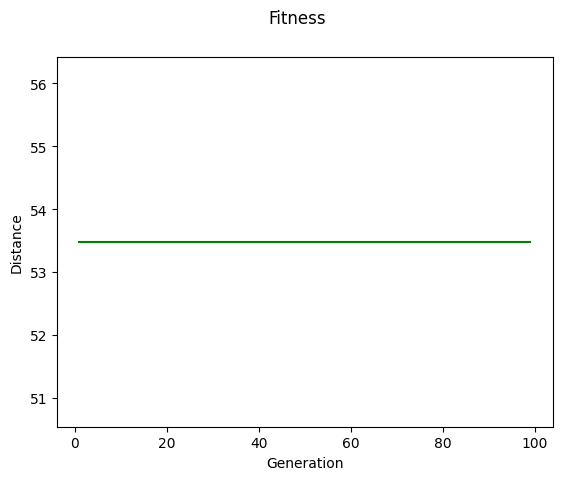

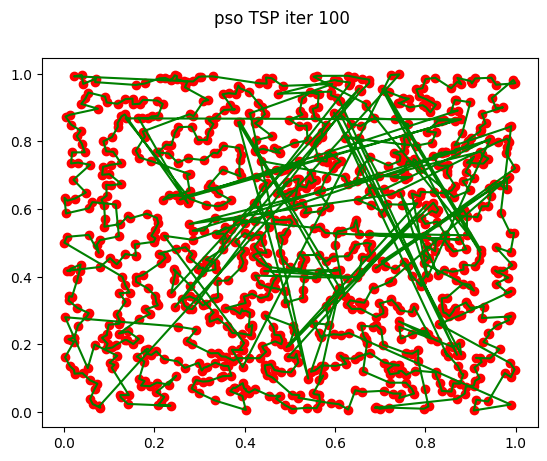

iteration = 200 cost: 53.4782852597951


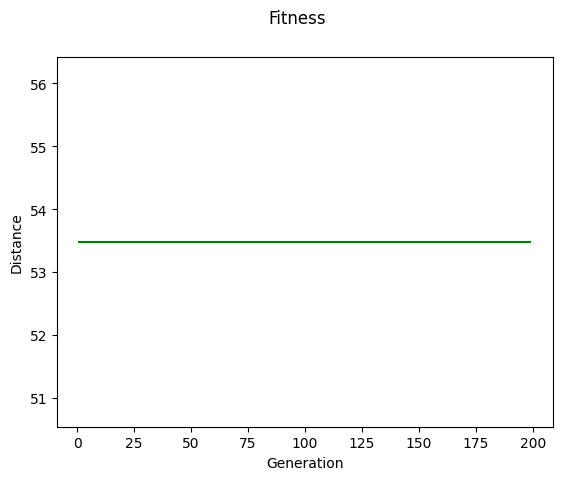

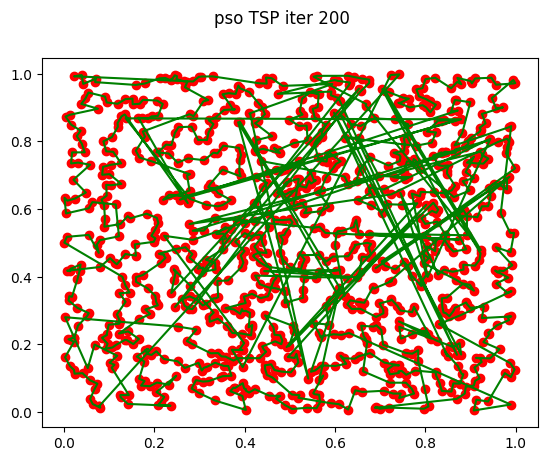

iteration = 300 cost: 53.4782852597951


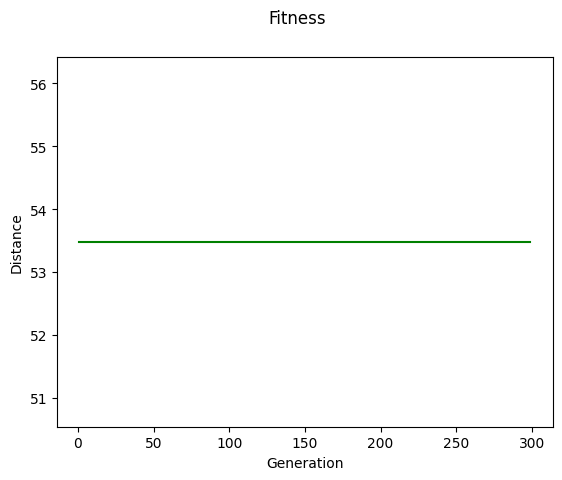

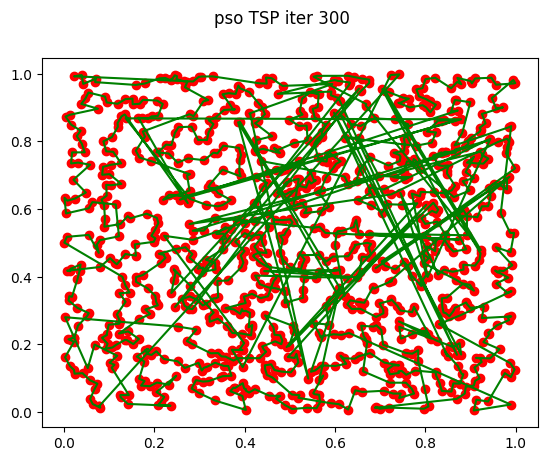

iteration = 400 cost: 53.41473933783672


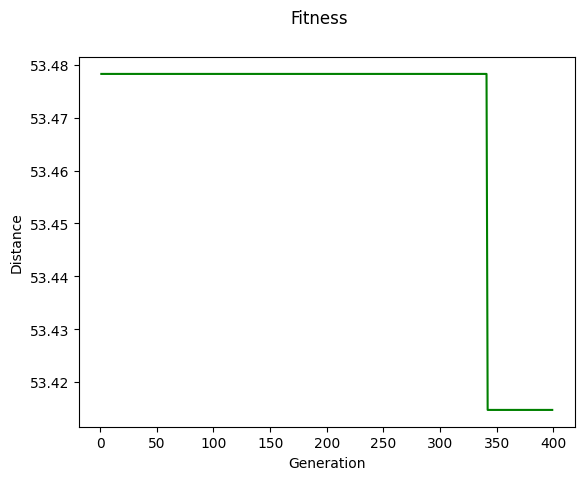

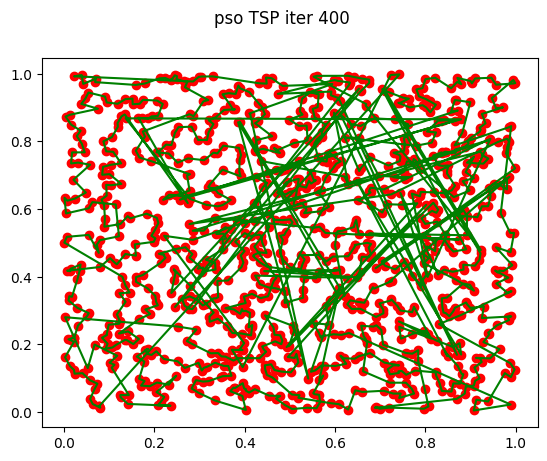

iteration = 500 cost: 53.41473933783672


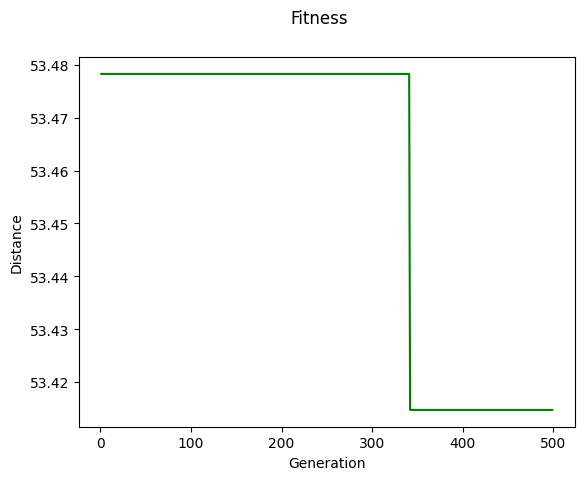

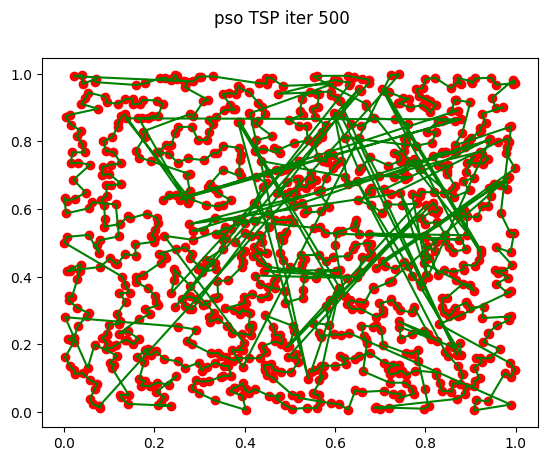

iteration = 600 cost: 53.41473933783672


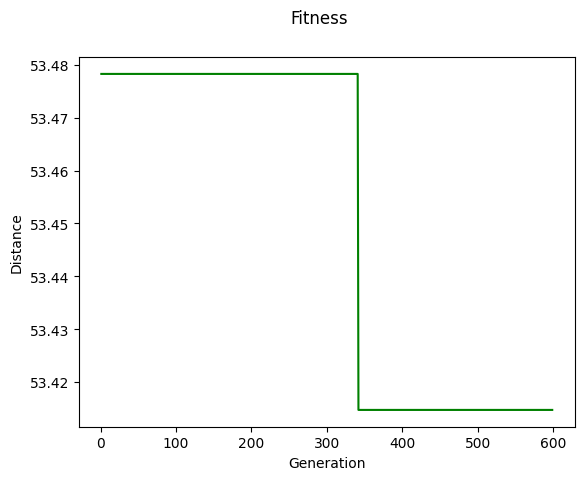

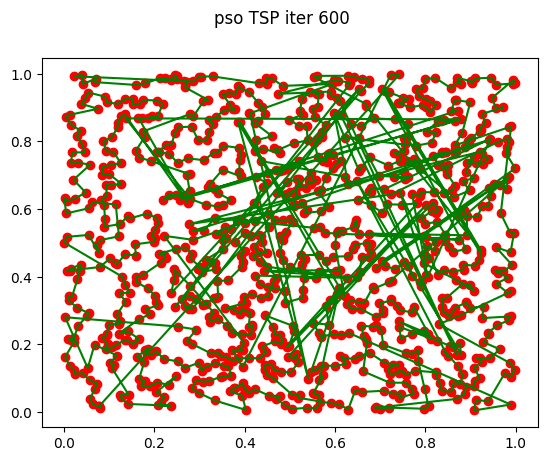

iteration = 700 cost: 53.41473933783672


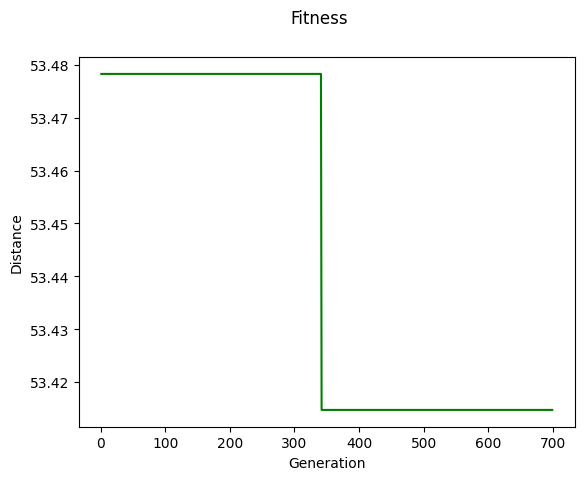

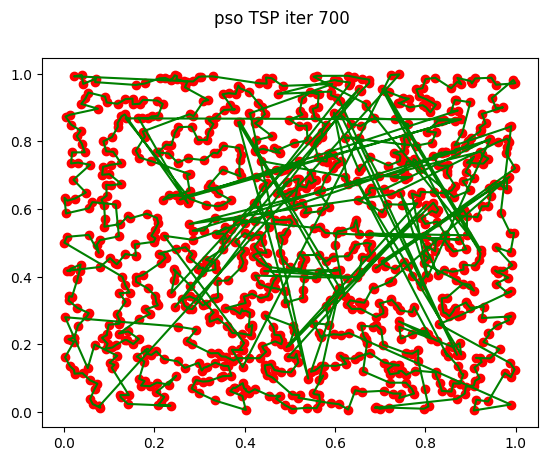

iteration = 800 cost: 53.41473933783672


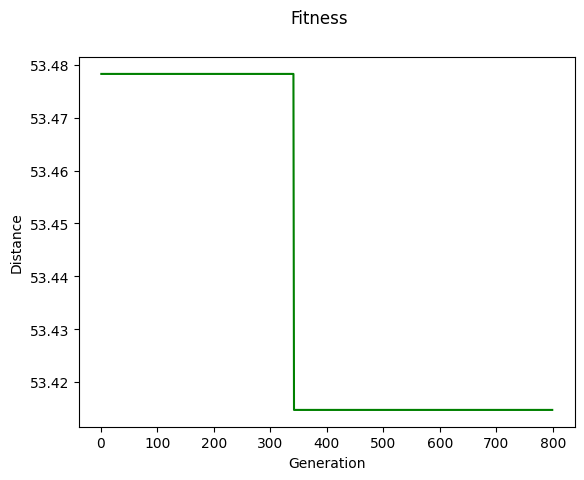

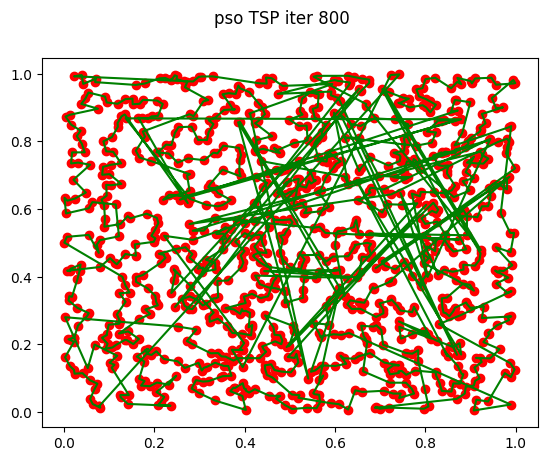

iteration = 900 cost: 53.41473933783672


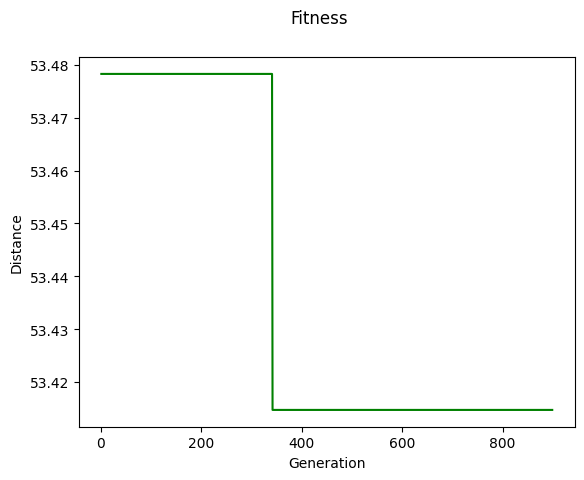

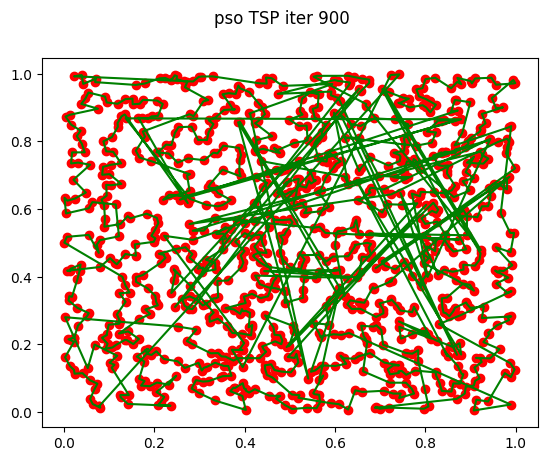

cost: 53.41473933783672
gbest: [{'x': 0.07751835449506972, 'y': 0.017017560815812405}, {'x': 0.08015022854714338, 'y': 0.012982836776446738}, {'x': 0.06335926511585066, 'y': 0.023617960672003724}, {'x': 0.05760321827719117, 'y': 0.0386726247390804}, {'x': 0.0677446726219213, 'y': 0.06868275911683064}, {'x': 0.07377742178566637, 'y': 0.0837965572786119}, {'x': 0.057288159379645376, 'y': 0.09410296517805772}, {'x': 0.0408056694216522, 'y': 0.11483725239845222}, {'x': 0.023151328462956866, 'y': 0.11347264961242975}, {'x': 0.021932026349456013, 'y': 0.12451969401914009}, {'x': 0.013459182236667533, 'y': 0.1352239434757322}, {'x': 0.0021433699371105064, 'y': 0.1618525465610403}, {'x': 0.021778936806593818, 'y': 0.2074277306526462}, {'x': 0.016075793804901983, 'y': 0.21153760288269385}, {'x': 0.0095849462640335, 'y': 0.21491327647043035}, {'x': 0.02107538222357086, 'y': 0.22026322743016225}, {'x': 0.022356038657951438, 'y': 0.21886530320993258}, {'x': 0.030728885902063463, 'y': 0.25575286853

In [1]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import math

class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other_city):
        dx = self.x - other_city.x
        dy = self.y - other_city.y
        return math.sqrt(dx ** 2 + dy ** 2)

class Particle:
    def __init__(self, route):
        self.route = route
        self.velocity = []
        self.cost = 0
        self.pbest = route[:]
        self.pbest_cost = float('inf')

    def update_costs_and_pbest(self):
        self.cost = sum(self.route[i].distance(self.route[i + 1]) for i in range(len(self.route) - 1))
        self.cost += self.route[-1].distance(self.route[0])  # Return to starting point
        if self.cost < self.pbest_cost:
            self.pbest = self.route[:]
            self.pbest_cost = self.cost

    def clear_velocity(self):
        self.velocity = []

class PSO:
    def __init__(self, iterations, population_size, gbest_probability=1.0, pbest_probability=1.0, cities=None):
        self.cities = cities
        self.gbest = None
        self.gcost_iter = []
        self.iterations = iterations
        self.population_size = population_size
        self.particles = []
        self.gbest_probability = gbest_probability
        self.pbest_probability = pbest_probability

        solutions = self.initial_population()
        self.particles = [Particle(route=solution) for solution in solutions]

    def random_route(self):
        return random.sample(self.cities, len(self.cities))

    def initial_population(self):
        random_population = [self.random_route() for _ in range(self.population_size - 1)]
        greedy_population = [self.greedy_route(0)]
        return [*random_population, *greedy_population]

    def greedy_route(self, start_index):
        unvisited = self.cities[:]
        del unvisited[start_index]
        route = [self.cities[start_index]]
        while len(unvisited):
            index, nearest_city = min(enumerate(unvisited), key=lambda item: item[1].distance(route[-1]))
            route.append(nearest_city)
            del unvisited[index]
        return route

    def run(self):
        self.gbest = min(self.particles, key=lambda p: p.pbest_cost)
        print(f"initial cost is {self.gbest.pbest_cost}")
        plt.ion()
        plt.draw()
        for t in range(self.iterations):
            self.gbest = min(self.particles, key=lambda p: p.pbest_cost)
            if t % 100 == 0:
                plt.figure(0)
                plt.plot(pso.gcost_iter, 'g')
                plt.ylabel('Distance')
                plt.xlabel('Generation')
                fig = plt.figure(0)
                fig.suptitle('Fitness')
                x_list, y_list = [], []
                
                for city in self.gbest.pbest:
                    x_list.append(city.x)
                    y_list.append(city.y)
                x_list.append(pso.gbest.pbest[0].x)
                y_list.append(pso.gbest.pbest[0].y)
                fig = plt.figure(1)
                fig.clear()
                fig.suptitle(f'pso TSP iter {t}')

                plt.plot(x_list, y_list, 'ro')
                plt.plot(x_list, y_list, 'g')
                plt.draw()
                
                if t % 50 == 0:
                    print(f'iteration = {t} cost: {pso.gbest.pbest_cost}')

                plt.pause(.001)
            self.gcost_iter.append(self.gbest.pbest_cost)

            for particle in self.particles:
                particle.clear_velocity()
                temp_velocity = []
                gbest = self.gbest.pbest[:]
                new_route = particle.route[:]

                for i in range(len(self.cities)):
                    if new_route[i] != particle.pbest[i]:
                        swap = (i, particle.pbest.index(new_route[i]), self.pbest_probability)
                        temp_velocity.append(swap)
                        new_route[swap[0]], new_route[swap[1]] = \
                            new_route[swap[1]], new_route[swap[0]]

                for i in range(len(self.cities)):
                    if new_route[i] != gbest[i]:
                        swap = (i, gbest.index(new_route[i]), self.gbest_probability)
                        temp_velocity.append(swap)
                        gbest[swap[0]], gbest[swap[1]] = gbest[swap[1]], gbest[swap[0]]

                particle.velocity = temp_velocity

                for swap in temp_velocity:
                    if random.random() <= swap[2]:
                        new_route[swap[0]], new_route[swap[1]] = \
                            new_route[swap[1]], new_route[swap[0]]
                        
                particle.route = new_route
                particle.update_costs_and_pbest()

# Helper function to read cities from a file
def read_cities(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    cities = []
    for line in lines:
        x, y = map(float, line.strip().split(','))
        cities.append(City(x, y))
    return cities


# Read cities from file
cities = read_cities('dataset/large.csv')
pso = PSO(iterations=1000, population_size=100, pbest_probability=0.9, gbest_probability=0.02, cities=cities)
pso.run()
print(f'cost: {pso.gbest.pbest_cost}')
print(f'gbest: {[city.__dict__ for city in pso.gbest.pbest]}')

# Shift the route so that it starts from the takeoff point (assuming the first city is the takeoff point)
takeoff_point = pso.gbest.pbest.index(cities[0])
pso.gbest.pbest = pso.gbest.pbest[takeoff_point:] + pso.gbest.pbest[:takeoff_point]
print(f'gbest: {[city.__dict__ for city in pso.gbest.pbest]}')

#cost: 53.41473933783672